<a href="https://colab.research.google.com/github/Doms-debug/convolve-pooling/blob/main/Lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pooling

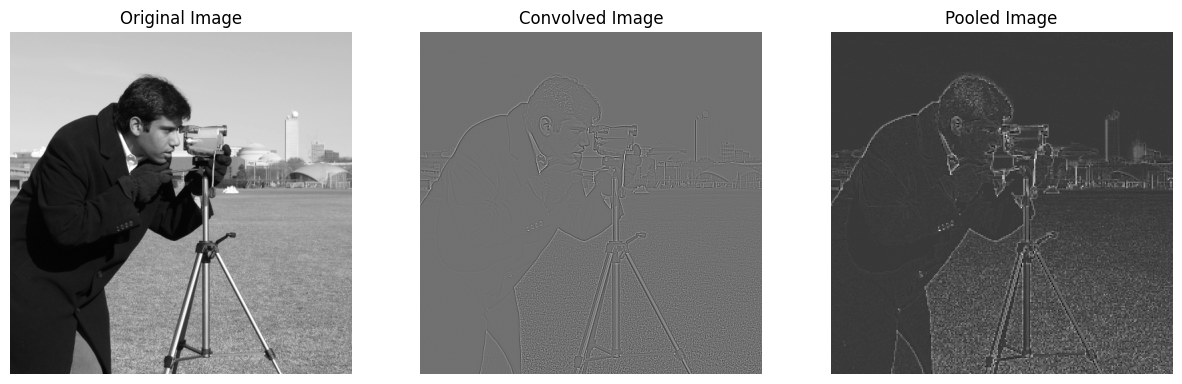

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from scipy.signal import convolve2d
from skimage.measure import block_reduce

# Load example image (grayscale)
image = data.camera()

# Define a simple kernel for edge detection
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

# Perform convolution
convolved_image = convolve2d(image, kernel, mode='same', boundary='symm')

# Uncomment below to apply different convolution options
# Example 1: Dilation
# from scipy.ndimage import binary_dilation
# dilated_image = binary_dilation(image, structure=np.ones((3,3)))
# convolved_image = convolve2d(dilated_image, kernel, mode='same', boundary='symm')

# Example 2: Padding
# pad_width = ((1, 1), (1, 1))  # Example of 1-pixel padding
# padded_image = np.pad(image, pad_width, mode='constant', constant_values=0)
# convolved_image = convolve2d(padded_image, kernel, mode='same', boundary='symm')

# Uncomment below to apply different pooling options
# Pooling
# Example 1: Max Pooling
pool_size = (2, 2)
pooled_image_max = block_reduce(convolved_image, pool_size, np.max)

# Example 2: Average Pooling
# pooled_image_avg = block_reduce(convolved_image, pool_size, np.mean)

# Example 3: Pooling with different strides
# pool_size = (2, 2)
# stride = (2, 2)
# pooled_image_strided = block_reduce(convolved_image, pool_size, np.max, stride=stride)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(convolved_image, cmap=plt.cm.gray)
ax[1].set_title('Convolved Image')
ax[1].axis('off')

ax[2].imshow(pooled_image_avg, cmap=plt.cm.gray)  # Change to pooled_image_avg or pooled_image_strided for different pooling options
ax[2].set_title('Pooled Image')
ax[2].axis('off')

plt.show()


# Convolve

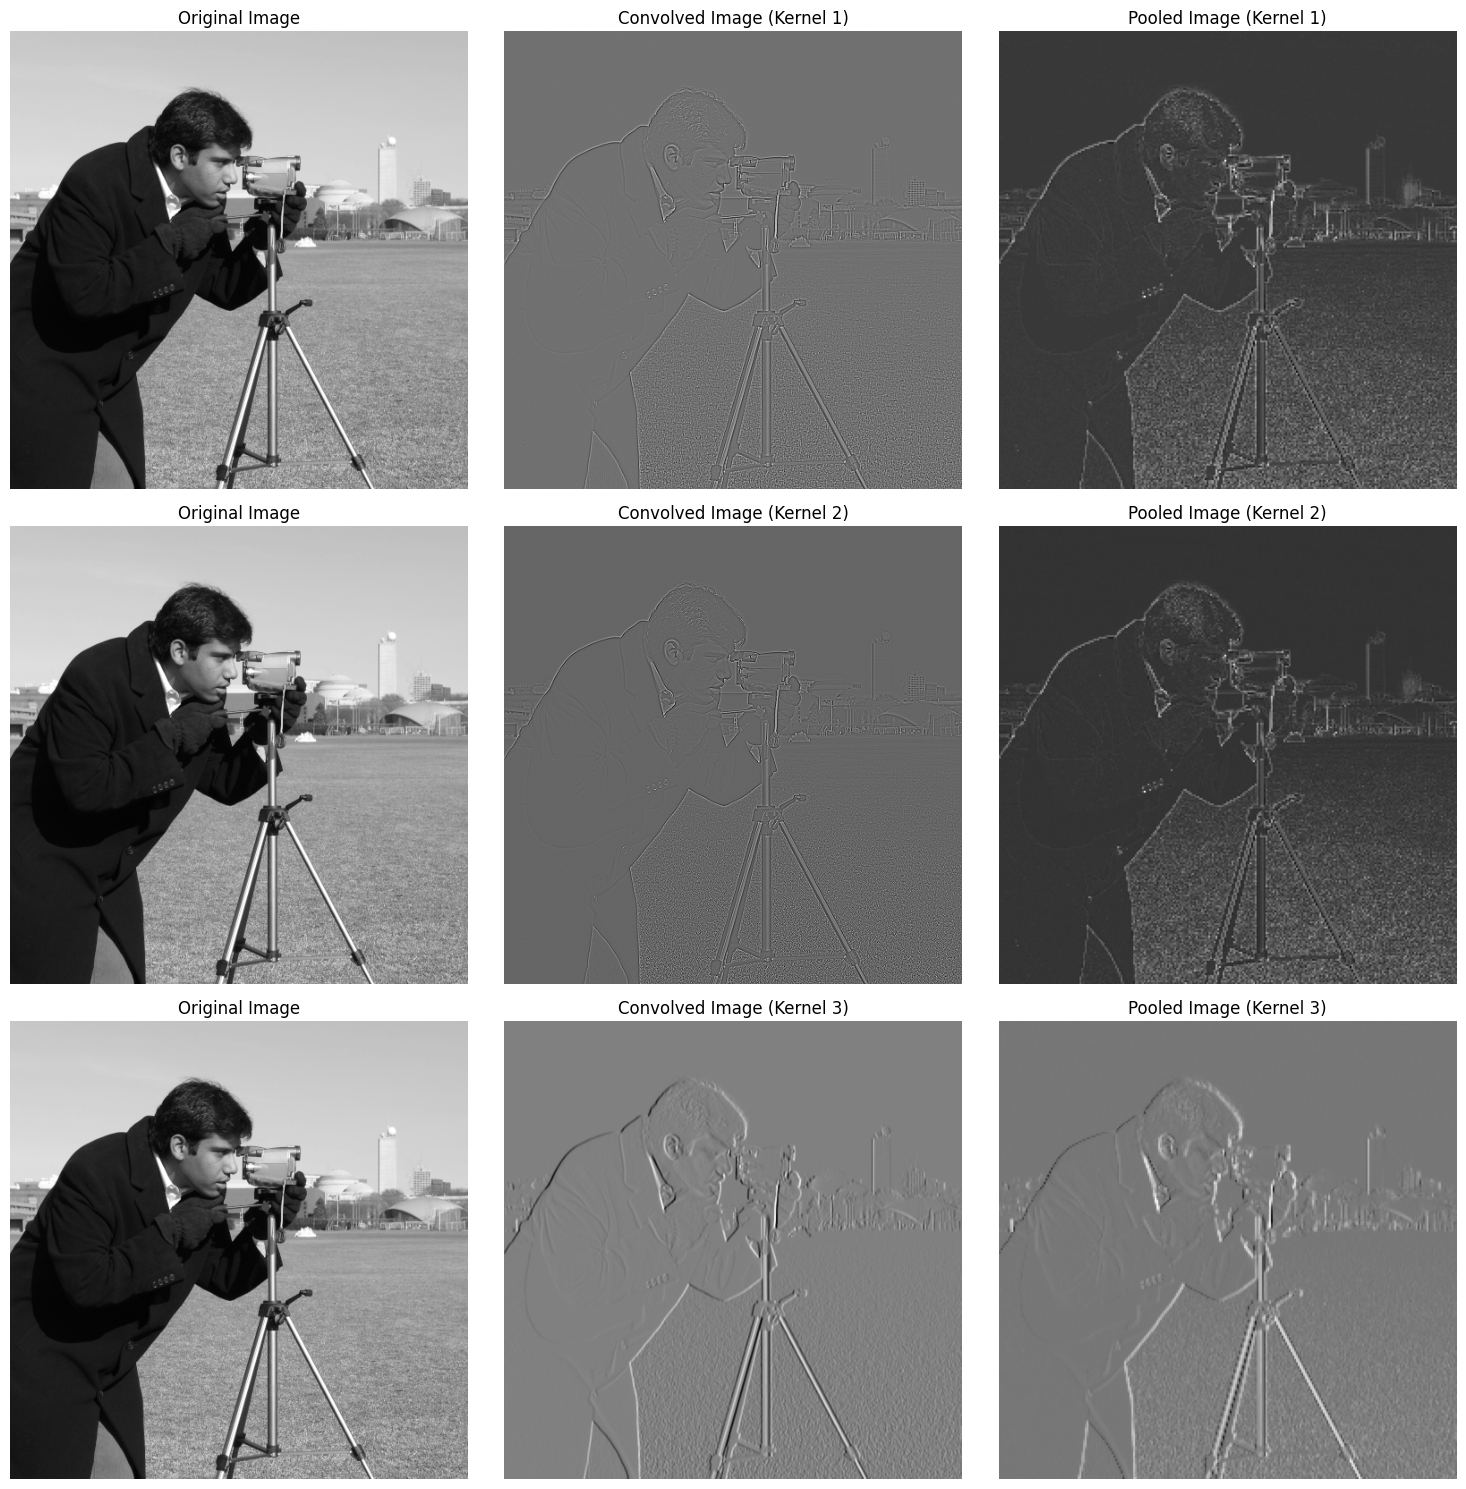

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from scipy.signal import convolve2d
from skimage.measure import block_reduce

# Load example image (grayscale)
image = data.camera()

# Define three different kernels
kernel1 = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])

kernel2 = np.array([[0, -1, 0],
                    [-1, 4, -1],
                    [0, -1, 0]])

kernel3 = np.array([[1, 0, -1],
                    [1, 0, -1],
                    [1, 0, -1]])

# Perform convolution for each kernel
convolved_image1 = convolve2d(image, kernel1, mode='same', boundary='symm')
convolved_image2 = convolve2d(image, kernel2, mode='same', boundary='symm')
convolved_image3 = convolve2d(image, kernel3, mode='same', boundary='symm')

# Pooling options
pool_size = (2, 2)

# Apply max pooling to the convolved images
pooled_image_max1 = block_reduce(convolved_image1, pool_size, np.max)
pooled_image_max2 = block_reduce(convolved_image2, pool_size, np.max)
pooled_image_max3 = block_reduce(convolved_image3, pool_size, np.max)

# Plotting
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, (kernel, convolved_image, pooled_image_max) in enumerate(zip([kernel1, kernel2, kernel3],
                                                                    [convolved_image1, convolved_image2,
                                                                     convolved_image3],
                                                                    [pooled_image_max1, pooled_image_max2,
                                                                     pooled_image_max3])):
    ax = axes[i]

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(convolved_image, cmap=plt.cm.gray)
    ax[1].set_title(f'Convolved Image (Kernel {i + 1})')
    ax[1].axis('off')

    ax[2].imshow(pooled_image_max, cmap=plt.cm.gray)
    ax[2].set_title(f'Pooled Image (Kernel {i + 1})')
    ax[2].axis('off')

plt.tight_layout()
plt.show()

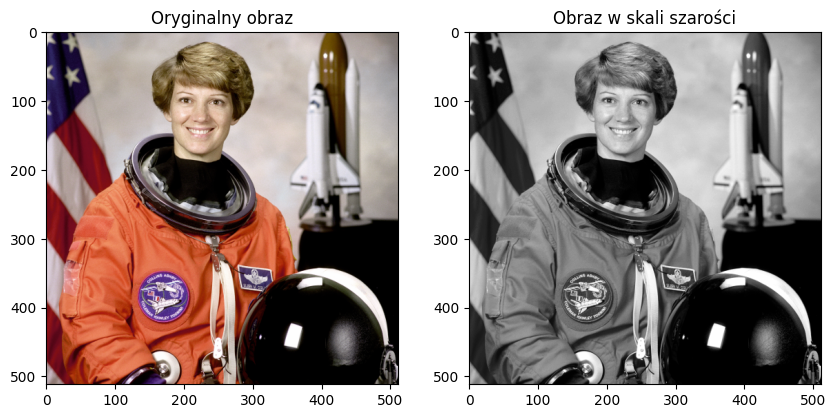

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray

image = data.astronaut()
grayscale_image = rgb2gray(image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Oryginalny obraz')
plt.subplot(1, 2, 2)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Obraz w skali szarości')
plt.show()

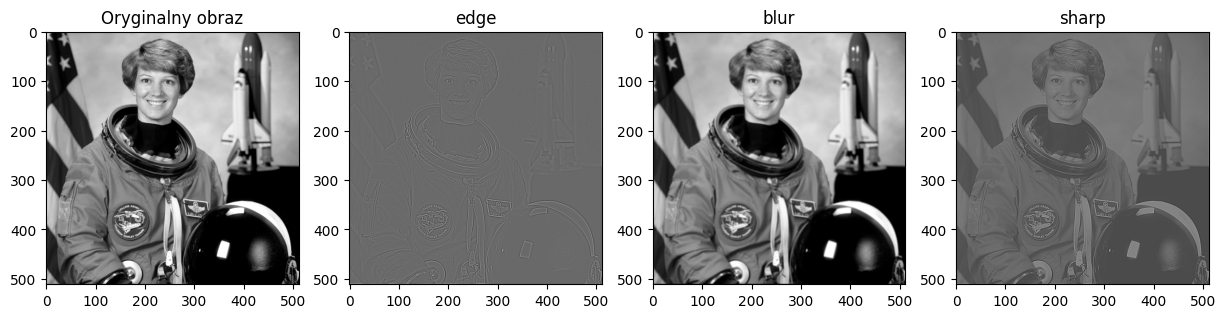

In [4]:
from scipy.signal import convolve2d

kernel_edge_detection = np.array([[-1, -1, -1],
                                   [-1, 8, -1],
                                   [-1, -1, -1]])

kernel_blur = np.array([[1, 1, 1],
                         [1, 1, 1],
                         [1, 1, 1]]) / 9

kernel_sharpen = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])

convolved_edge = convolve2d(grayscale_image, kernel_edge_detection, mode='same')
convolved_blur = convolve2d(grayscale_image, kernel_blur, mode='same')
convolved_sharpen = convolve2d(grayscale_image, kernel_sharpen, mode='same')

plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Oryginalny obraz')
plt.subplot(1, 4, 2)
plt.imshow(convolved_edge, cmap='gray')
plt.title('edge')
plt.subplot(1, 4, 3)
plt.imshow(convolved_blur, cmap='gray')
plt.title('blur')
plt.subplot(1, 4, 4)
plt.imshow(convolved_sharpen, cmap='gray')
plt.title('sharp')
plt.show()

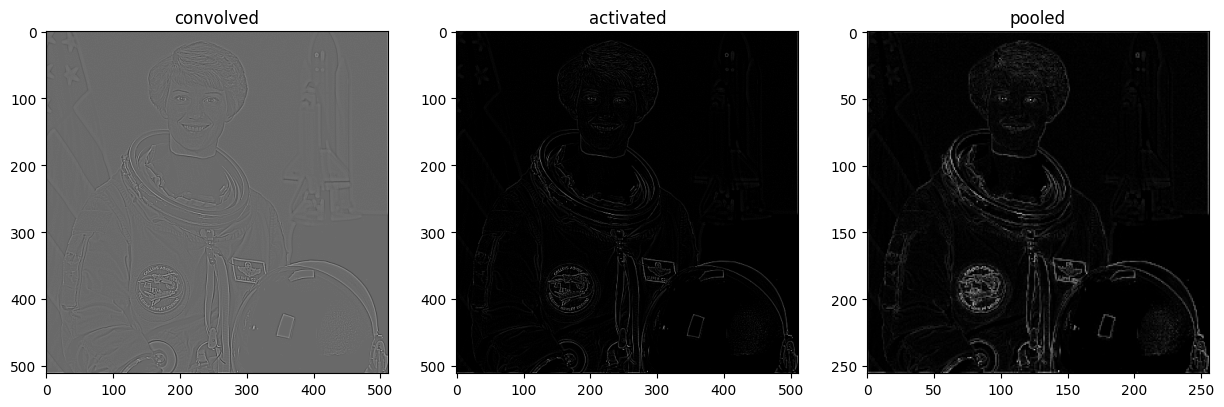

In [5]:
def relu(x):
  return np.maximum(0, x)

def max_pooling(x, pool_size):
  from skimage.measure import block_reduce
  return block_reduce(x, (pool_size, pool_size), np.max)

def flatten(x):
  return x.flatten()

convolved = convolve2d(grayscale_image, kernel_edge_detection, mode='same')
activated = relu(convolved)
pooled = max_pooling(activated, 2)
flattened = flatten(pooled)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(convolved, cmap='gray')
plt.title('convolved')
plt.subplot(1, 3, 2)
plt.imshow(activated, cmap='gray')
plt.title('activated')
plt.subplot(1, 3, 3)
plt.imshow(pooled, cmap='gray')
plt.title('pooled')
plt.show()

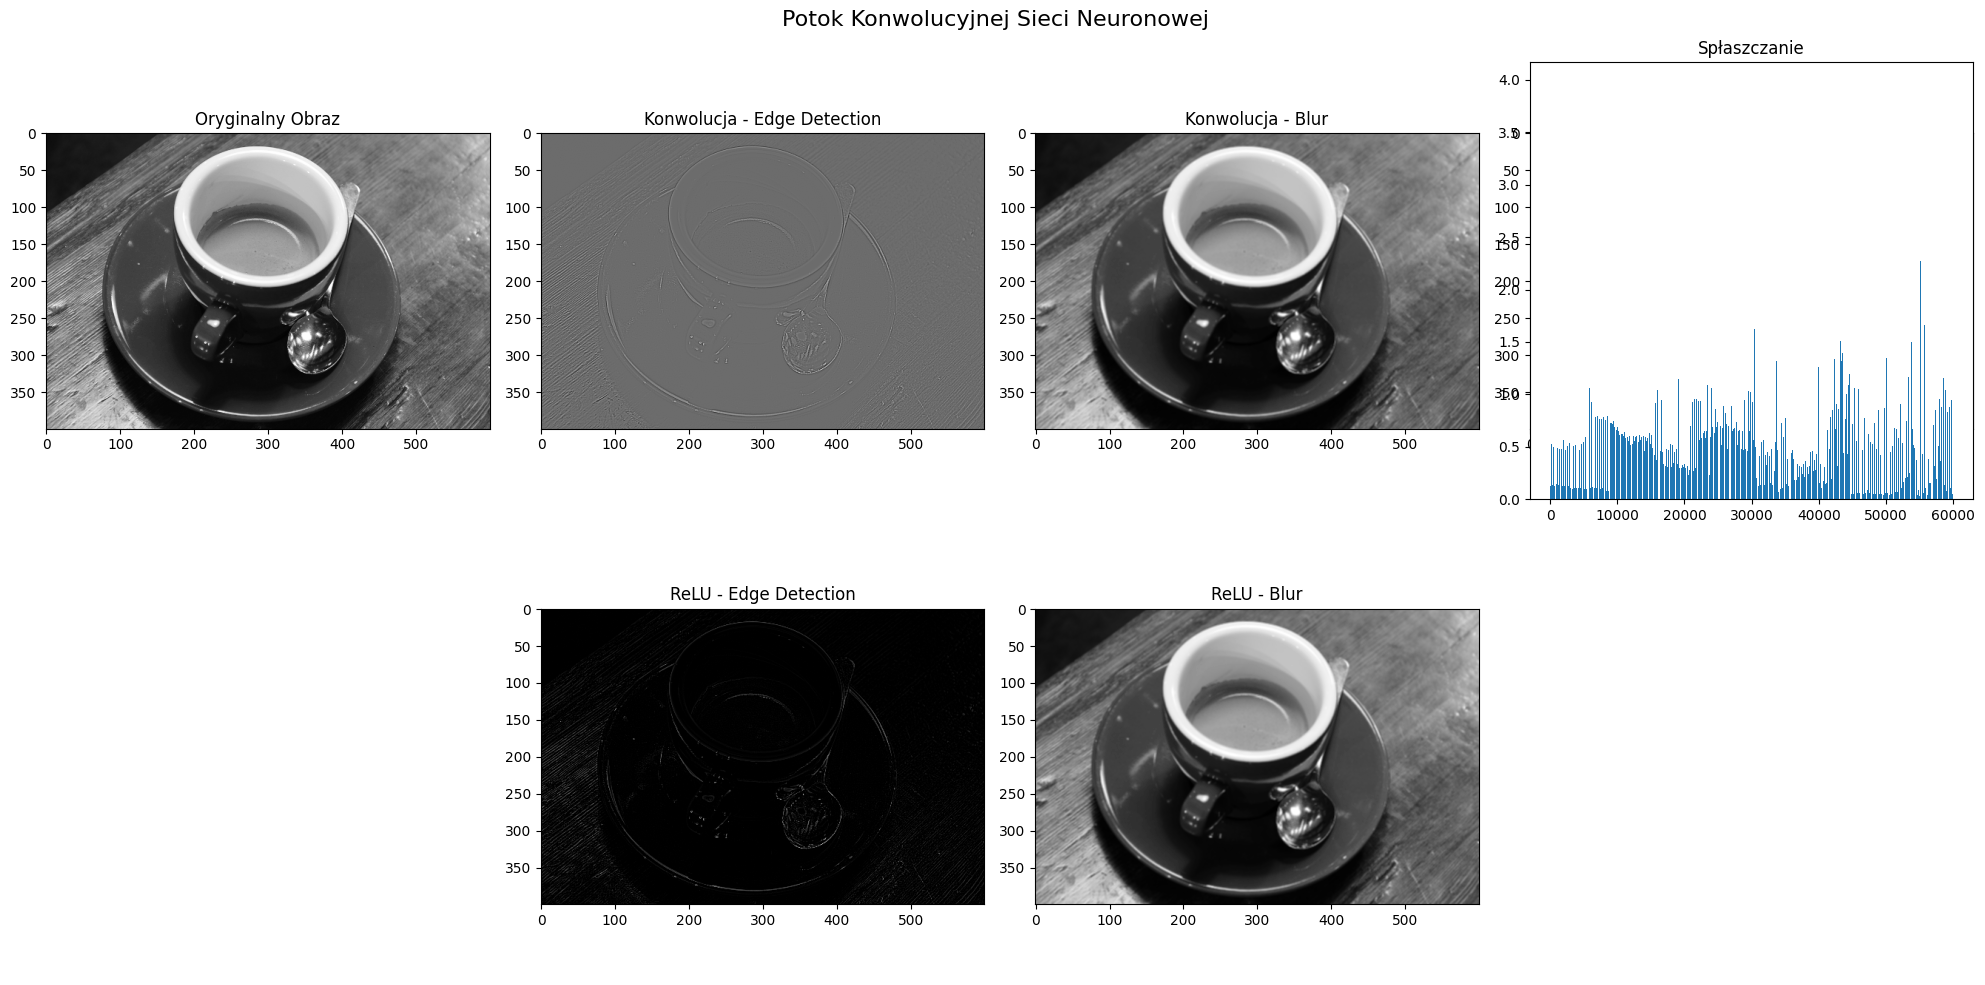

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color

def create_filters():
    """Zdefiniuj różne filtry do konwolucji."""
    edge_detection = np.array([
        [-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]
    ])

    blur = np.array([
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9]
    ])

    sharpen = np.array([
        [ 0, -1,  0],
        [-1,  5, -1],
        [ 0, -1,  0]
    ])

    return {
        'edge_detection': edge_detection,
        'blur': blur,
        'sharpen': sharpen
    }

def convolution(image, kernel):
    """Operacja splotu."""
    h, w = image.shape
    k_size = kernel.shape[0]
    pad = k_size // 2

    output = np.zeros_like(image)
    padded_image = np.pad(image, pad, mode='edge')

    for y in range(h):
        for x in range(w):
            output[y, x] = np.sum(
                padded_image[y:y+k_size, x:x+k_size] * kernel
            )

    return output

def relu(image):
    """Funkcja aktywacji ReLU."""
    return np.maximum(image, 0)

def max_pooling(image, pool_size=2):
    """Operacja łączenia (pooling)."""
    h, w = image.shape
    output_h, output_w = h // pool_size, w // pool_size
    output = np.zeros((output_h, output_w))

    for y in range(output_h):
        for x in range(output_w):
            output[y, x] = np.max(
                image[y*pool_size:(y+1)*pool_size,
                      x*pool_size:(x+1)*pool_size]
            )

    return output

def flatten(image):
    """Spłaszczanie wielowymiarowej macierzy do wektora."""
    return image.flatten()

def visualize_cnn_pipeline(image):
    """Kompleksowa wizualizacja potoku CNN."""
    filters = create_filters()

    num_filters = len(filters)
    fig, axs = plt.subplots(2, num_filters + 1, figsize=(5 * (num_filters + 1), 10))
    fig.suptitle('Potok Konwolucyjnej Sieci Neuronowej', fontsize=16)

    axs[0, 0].imshow(image, cmap='gray')
    axs[0, 0].set_title('Oryginalny Obraz')
    axs[1, 0].axis('off')  # Ukryj pusty subplot

    # Operacje na filtrach
    for i, (name, filter_kernel) in enumerate(filters.items(), 1):
        conv_result = convolution(image, filter_kernel)
        relu_result = relu(conv_result)
        pooling_result = max_pooling(relu_result)

        axs[0, i].imshow(conv_result, cmap='gray')
        axs[0, i].set_title(f'Konwolucja - {name.replace("_", " ").title()}')

        axs[1, i].imshow(relu_result, cmap='gray')
        axs[1, i].set_title(f'ReLU - {name.replace("_", " ").title()}')

    # Spłaszczanie
    final_pooling = max_pooling(relu(convolution(image, list(filters.values())[-1])))
    flattened = flatten(final_pooling)
    fig.delaxes(axs[1, -1])  # Usuń ostatni subplot

    # Dodaj osobny wykres dla spłaszczania
    ax_flattened = fig.add_subplot(2, num_filters + 1, num_filters + 1)
    ax_flattened.bar(range(len(flattened)), flattened)
    ax_flattened.set_title('Spłaszczanie')

    plt.tight_layout()
    plt.show()

# potok
def main():
    image = color.rgb2gray(data.coffee())

    visualize_cnn_pipeline(image)

if __name__ == "__main__":
    main()